# 1. Importing the data
We start off by importing the librarys and the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from datetime import datetime

#Imports data as a dataframe(from pandas library)
#df = pd.read_excel('Lista Incendios_2015.xlsx')

# df = pd.read_csv('Lista Incendios_2015.csv')

In [3]:
url = 'https://raw.githubusercontent.com/jppego/fced_g12/main/Lista%20Incendios_2015.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

#Step 3. Explore the data

# 2. Exploring

In [ ]:
# Checking which columns are in the dataset
print(list(df.columns))

['Ano', 'Codigo SGIF', 'Codigo_ANPC', 'Tipo', 'Distrito', 'Concelho', 'Freguesia', 'Local', 'INE', 'x', 'y', 'lat', 'lon', 'DataAlerta', 'HoraAlerta', 'DataExtincao', 'HoraExtincao', 'Data1Intervencao', 'Hora1Intervencao', 'FonteAlerta', 'NUT', 'AA_Povoamento (ha)', 'AA_Mato (ha)', 'AA_Agricola (ha)', 'AA_EspacosFlorestais (pov+mato)(ha)', 'AA_Total (pov+mato+agric) (ha)', 'Reacendimentos', 'Queimada', 'Falso Alarme', 'Fogacho', 'Incendio', 'Agricola', 'Perimetro', 'APS', 'Causa', 'TipoCausa', 'Região PROF', 'UGF']


In [ ]:
# Having a general overview
df.head()

,Ano,Codigo SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,x,y,lat,lon,DataAlerta,HoraAlerta,DataExtincao,HoraExtincao,Data1Intervencao,Hora1Intervencao,FonteAlerta,NUT,AA_Povoamento (ha),AA_Mato (ha),AA_Agricola (ha),AA_EspacosFlorestais (pov+mato)(ha),AA_Total (pov+mato+agric) (ha),Reacendimentos,Queimada,Falso Alarme,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,Região PROF,UGF
0,2015,DM315252,2015160007544,Florestal,Viana do Castelo,Ponte de Lima,Serdedelo,VALE DE TROVELA (SERDEDELO),160746,167814,530896,41:44:48.5663999999878'',8:31:12.3276000000027'',2015-03-24 00:00:00.000,17:01,2015-03-24 00:00:00.000,18:09,2015-03-24 00:00:00.000,17:10,NaN,PT11010746,2.50,0.00,0.0,2.50,2.50,0.0,0,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Alto Minho
1,2015,DM215305,2015130043758,Florestal,Porto,Marco de Canaveses,Vila Boa de Quires,LUGAR DO FOFO,130731,193731,471896,41:12:58.4280000000109'',8:12:28.3788000000025'',2015-03-24 00:00:00.000,17:10,2015-03-24 00:00:00.000,18:47,2015-03-24 00:00:00.000,17:16,NaN,PT11050731,0.00,1.35,0.0,1.35,1.35,0.0,0,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Tâmega
2,2015,DM415293,2015030021973,Florestal,Braga,Vila Verde,Lage,RUA PROF ABEL MADEIRA,31323,172162,517209,41:37:25.5539999999957'',8:28:1.8084000000006'',2015-03-24 00:00:00.000,19:15,2015-03-24 00:00:00.000,20:00,2015-03-24 00:00:00.000,19:25,NaN,PT11021323,0.26,0.00,0.0,0.26,0.26,0.0,0,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho
3,2015,DM315261,2015160007563,Falso Alarme,Viana do Castelo,Ponte de Lima,Boalhosa,J. DEPOSITOS DE AGUA (BOALHOSA),160709,171291,529577,41:44:6.30240000000185'',8:28:41.6172000000014'',2015-03-24 00:00:00.000,20:05,2015-03-24 00:00:00.000,21:30,2015-03-24 00:00:00.000,20:20,NaN,PT11010709,0.00,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,NaN,NaN,630.0,Desconhecida,Entre Douro e Minho,Alto Minho
4,2015,BL115321,2015180015874,Agrícola,Viseu,Castro Daire,Castro Daire,Farejinhas - Bº das Queirós,180304,217299,436999,40:54:6.67440000000056'',7:55:40.1268000000016'',2015-03-24 00:00:00.000,20:10,2015-03-24 00:00:00.000,21:00,2015-03-24 00:00:00.000,20:15,NaN,PT12050304,0.00,0.05,0.0,0.05,0.05,0.0,0,0,1,0,0,NaN,NaN,630.0,Desconhecida,Beira Litoral,Dão Lafões


In [ ]:
# Checking the initial size of the dataset
print(f"Rows: {len(df)}")
print(f"Columns: {len(df.columns)}")

Rows: 23175
Columns: 38


In [ ]:
# Columns that have numeric fields, for which the statistic descriptors (mean, stdev, max, min, etc.) make sense.
isNumFields = ['AA_Povoamento (ha)', 'AA_Mato (ha)', 'AA_Agricola (ha)', 'AA_EspacosFlorestais (pov+mato)(ha)', 'AA_Total (pov+mato+agric) (ha)', 'Reacendimentos', 'Queimada', 'Falso Alarme', 'Fogacho', 'Incendio', 'Agricola']

In [ ]:
# Statistics of the numeric data

df_num = df[isNumFields]
df_num.describe()

,AA_Povoamento (ha),AA_Mato (ha),AA_Agricola (ha),AA_EspacosFlorestais (pov+mato)(ha),AA_Total (pov+mato+agric) (ha),Reacendimentos,Queimada,Falso Alarme,Fogacho,Incendio,Agricola
count,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000
mean,1.024671,1.756081,0.167752,2.780753,2.948505,0.061834,0.026882,0.126214,0.540539,0.143430,0.162934
std,19.487999,40.187748,3.089877,49.350016,50.083970,0.240859,0.161743,0.332097,0.498365,0.350519,0.369314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.005000,0.000000,0.020000,0.040000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.100000,0.000000,0.230000,0.340000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1548.920000,4499.000000,224.160000,4661.000000,4673.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We conclude that the burnt areas statiatics (mean, stdev, quantiles) are dominated by small areas. Let's have a look at different areas of forest fires.


In [ ]:
# Finding the records with area <= 1 ha
df_Area_1ha = df[df['AA_Total (pov+mato+agric) (ha)']<=1]
df_Area_1ha = df_Area_1ha [isNumFields]
df_Area_1ha.describe()

,AA_Povoamento (ha),AA_Mato (ha),AA_Agricola (ha),AA_EspacosFlorestais (pov+mato)(ha),AA_Total (pov+mato+agric) (ha),Reacendimentos,Queimada,Falso Alarme,Fogacho,Incendio,Agricola
count,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000
mean,0.031387,0.076146,0.020093,0.107533,0.127626,0.062247,0.027971,0.146360,0.626770,0.023468,0.175432
std,0.122382,0.184209,0.095895,0.218502,0.230311,0.241609,0.164894,0.353475,0.483675,0.151387,0.380345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.002100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.001200,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.050000,0.000000,0.100000,0.114700,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

nArea_1ha = len(df_Area_1ha['AA_Total (pov+mato+agric) (ha)'])
print(f'There are {nArea_1ha} fires with with area  <= 1ha')

There are 19985 fires with with area  <= 1ha


In [ ]:
# Finding the records with 1 ha < area <= 10 ha
## SOURCE: https://stackoverflow.com/questions/29461185/filtering-pandas-dataframe-using-or-statement
df_Area_10ha = df[(df['AA_Total (pov+mato+agric) (ha)'] > 1) & (df['AA_Total (pov+mato+agric) (ha)'] <= 10)]

df_Area_10ha = df_Area_10ha [isNumFields]
df_Area_10ha.describe()


,AA_Povoamento (ha),AA_Mato (ha),AA_Agricola (ha),AA_EspacosFlorestais (pov+mato)(ha),AA_Total (pov+mato+agric) (ha),Reacendimentos,Queimada,Falso Alarme,Fogacho,Incendio,Agricola
count,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.0,2559.000000,2559.000000,2559.000000
mean,1.014423,1.792430,0.287410,2.806854,3.094264,0.055881,0.017976,0.0,0.000391,0.889019,0.092614
std,1.658023,1.963364,1.009576,2.197715,2.111980,0.229737,0.132889,0.0,0.019768,0.314170,0.289948
min,0.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.500000,1.500000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
50%,0.000000,1.500000,0.000000,2.000000,2.200000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
75%,1.500000,2.495000,0.000000,3.595000,4.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:
nArea_10ha = len(df_Area_10ha['AA_Total (pov+mato+agric) (ha)'])

print(f'There are {nArea_10ha} fires with 1ha < area  <= 10ha')

There are 2559 fires with 1ha < area  <= 10ha


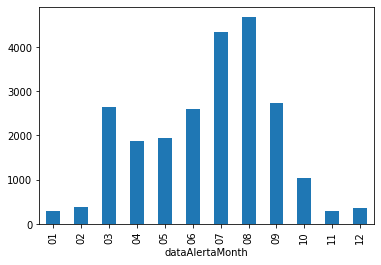

In [ ]:
# Number of fires per Month
def get_month(date):
  return date.split('-')[1]

df['dataAlertaMonth'] = df['DataAlerta'].apply(get_month)
df.groupby('dataAlertaMonth').size().plot(kind='bar')

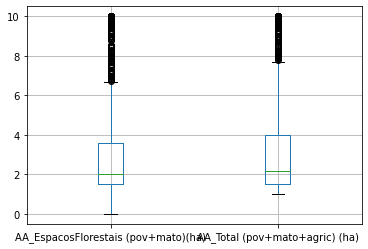

In [ ]:
# box-plot of the data

## SOURCE: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

df_boxplot = df_Area_10ha[['AA_EspacosFlorestais (pov+mato)(ha)', 'AA_Total (pov+mato+agric) (ha)',]]
df_boxplot.boxplot()

In [ ]:
# Finding the records with area > 10 ha
## SOURCE: https://stackoverflow.com/questions/29461185/filtering-pandas-dataframe-using-or-statement
df_Area_large = df[df['AA_Total (pov+mato+agric) (ha)'] > 10]

df_Area_large = df_Area_large [isNumFields]
df_Area_large.describe()

,AA_Povoamento (ha),AA_Mato (ha),AA_Agricola (ha),AA_EspacosFlorestais (pov+mato)(ha),AA_Total (pov+mato+agric) (ha),Reacendimentos,Queimada,Falso Alarme,Fogacho,Incendio,Agricola
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.0,631.0,631.000000,631.000000
mean,32.525487,54.815474,4.359146,87.340961,91.700107,0.072900,0.028526,0.0,0.0,0.919176,0.052298
std,113.723968,237.660186,18.122221,286.662436,290.013444,0.260179,0.166603,0.0,0.0,0.272781,0.222804
min,0.000000,0.000000,0.000000,0.000000,10.022000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.000000,6.456500,0.000000,14.725000,15.220000,0.000000,0.000000,0.0,0.0,1.000000,0.000000
50%,4.000000,15.620000,0.000000,23.420000,25.297000,0.000000,0.000000,0.0,0.0,1.000000,0.000000
75%,19.000000,33.215000,0.000000,54.250000,58.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000
max,1548.920000,4499.000000,224.160000,4661.000000,4673.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


In [ ]:
nArea_large = len( df_Area_large['AA_Total (pov+mato+agric) (ha)'])

print(f'There are {nArea_large} fires with area  > 10ha')

There are 631 fires with area  > 10ha


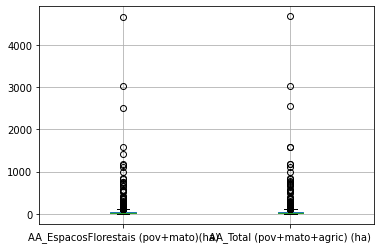

In [ ]:
# box-plot of the data

## SOURCE: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

df_boxplot = df_Area_large[['AA_EspacosFlorestais (pov+mato)(ha)', 'AA_Total (pov+mato+agric) (ha)',]]

boxplot = df_boxplot.boxplot()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


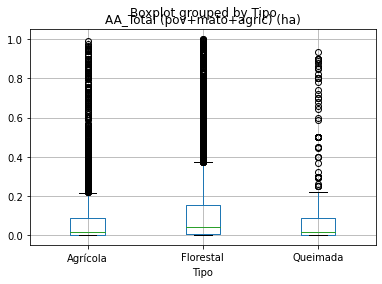

In [ ]:
# Most fires don't even reach 1HA
# Even if we do a box plot for those < 1ha, the percentil 75 sits under 0.2ha
df_under_1ha = df[(df['AA_Total (pov+mato+agric) (ha)'] < 1) & (df['AA_Total (pov+mato+agric) (ha)'] > 0)]
df_under_1ha.boxplot('AA_Total (pov+mato+agric) (ha)', by='Tipo')

In [ ]:
# Segmentation based on the total burnt area
def segmentation(area):
  if area < 1:
    return 'Fogacho'
  elif area < 10:
    return '<10'
  elif area < 300: # As Queimadas, Fogachos e Agrícola têm no máximo 283 ha
    return '<300'
  else:
    return '>300'

df['TotalAreaSegm'] = df['AA_Total (pov+mato+agric) (ha)'].apply(segmentation)

In [ ]:
# RV - Since there's no column for the fire duration, i'll assume the duration is approximately equal to the difference between the first alert and the fire extinction.
# Custom function to get the duration (in seconds and in hours)
def get_duration(line):
  try:
    da = line['DataAlerta'].split(' ')[0].split('-') #Date Alert
    ha = line['HoraAlerta'].split(':') #Hour Alert
    de = line['DataExtincao'].split(' ')[0].split('-') #Date Extinction
    he = line['HoraExtincao'].split(':') #Hour Extinction
    dt_a = datetime(int(da[0]), int(da[1]), int(da[2]), int(ha[0]), int(ha[1]))
    dt_e = datetime(int(de[0]), int(de[1]), int(de[2]), int(he[0]), int(he[1]))
    return (dt_e - dt_a).seconds
  except:
    return np.nan

df['Duration'] = df.apply(get_duration, axis = 1)
df['DurationHours'] = df['Duration'] / 60 / 60

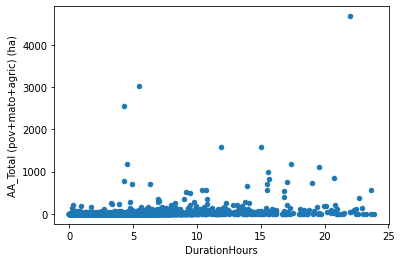

In [ ]:
# Relation between total burnt area and duration
df.plot.scatter('DurationHours', 'AA_Total (pov+mato+agric) (ha)')

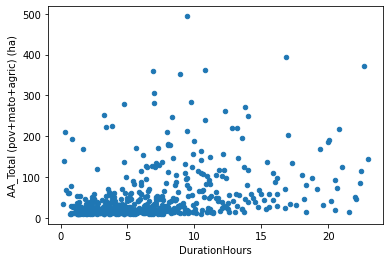

In [ ]:
# Same but only for fires betweeen 1ha and 500ha
df[(df['AA_Total (pov+mato+agric) (ha)'] > 10) & (df['AA_Total (pov+mato+agric) (ha)'] <= 500)].plot.scatter('DurationHours', 'AA_Total (pov+mato+agric) (ha)')

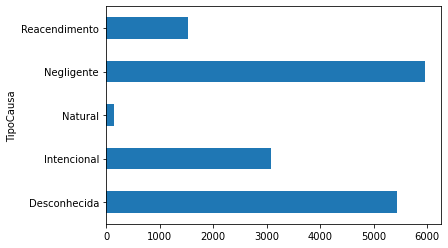

In [ ]:
# Inclusao de analise de todos os Tipos de Causas de incendio

df_cause = df.groupby('TipoCausa').size().plot(kind='barh')

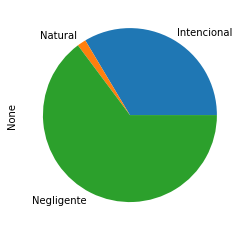

In [ ]:
# Inclusao de analise dos Tipos de Causas de incendio a considerar no estudo

only_causes = ['Intencional','Negligente','Natural']

df_cause = df[df['TipoCausa'].isin(only_causes)]
df_cause = df_cause.groupby('TipoCausa').size().plot(kind='pie')

# 3. Cleaning

In [ ]:
# Eliminei esta linha, porque a tabela seguinte fornece a mesma informação, com a contagem por classe
# 
# On the types there's a "false alarm"
#df['Tipo'].unique()


In [ ]:
# Summary of data by type of record 
df_tipo = df.groupby('Tipo')['Tipo'].count()
print (df_tipo)

false_alarm_perc = round(df_tipo['Falso Alarme']/df['Tipo'].count()*100,2)

print (f"There are {df_tipo['Falso Alarme']} false alarms, that represent {false_alarm_perc}% of the records.")

Tipo
Agrícola         4163
Falso Alarme     2925
Florestal       15464
Queimada          623
Name: Tipo, dtype: int64
There are 2925 false alarms, that represent 12.62% of the records.


In [ ]:
# Removing false alarms
false_alarm_count = df['Tipo'].value_counts()['Falso Alarme']
df = df[df['Tipo'] != 'Falso Alarme']
print(f'Removed {false_alarm_count} lines due to false alarm')

Removed 2925 lines due to false alarm


In [ ]:
# Eliminei esta linha, porque a tabela seguinte fornece a mesma informação, com a contagem por classe
# 
# Checking all the fire causes
#df['TipoCausa'].unique()

In [ ]:
# Summary of causes
#df = df[df['TotalAreaSegm']!='Fogacho'] # Eliminates fires less than 1ha
df_causa = df.groupby('TipoCausa')['TipoCausa'].count() # Groups the data by "TipoCausa" and counts the number of recods for each
print (df_causa)

nFires = len(df['TipoCausa']) # Total number of fires, excluding false alarms
nNULL = len(df['TipoCausa']) - df['TipoCausa'].count()
pDesconhecida = round(df_causa['Desconhecida']/nFires*100,2) # Percentage of unknow origin fires
pReacendimento = round(df_causa['Reacendimento']/nFires*100,2) # Percentage of restarted fires
pNULL = round(nNULL/nFires*100,2) # Percentage of NULL values in TipoCausa


TipoCausa
Desconhecida     5214
Intencional      3085
Natural           150
Negligente       5952
Reacendimento    1533
Name: TipoCausa, dtype: int64


In [ ]:
print(f"There is a total of {nFires} records of fires") # Total number of fire records, excluded false alarms
print (f"There are {df_causa['Desconhecida']} fires of unknonw origin, that represent {pDesconhecida}% of the fires.")
print (f"There are {df_causa['Reacendimento']} fire restarts, that represent {pReacendimento}% of the fires.")
print (f"There are {nNULL} fires without information about the cause (NULL values), that represent {pNULL}% of the fires.")
print(f'In {pDesconhecida + pNULL}% of fires the cause of the fire could not be determined. ')

There is a total of 20250 records of fires
There are 5214 fires of unknonw origin, that represent 25.75% of the fires.
There are 1533 fire restarts, that represent 7.57% of the fires.
There are 4316 fires without information about the cause (NULL values), that represent 21.31% of the fires.
In 47.06% of fires the cause of the fire could not be determined. 


In [ ]:
# From those we're about to ignore Desconhecida/Reacendimento and Nulls
to_ignore = ['Desconhecida', 'Reacendimento', np.nan] # Values of "TipoCausa" we want to ignore in the analysis
df = df[df['TipoCausa'].isin(to_ignore) == False]

In [ ]:
# There are some fires without region (With region == '-' or even nulls)
df = df[df['Região PROF'].isin(['-', np.nan]) == False]

In [ ]:
# We define the Center region by the District in the region
region_Centro = ['Aveiro', 'Viseu', 'Guarda', 'Coimbra', 'Castelo Branco', 'Leiria', 'Santarém']
df_centro = df[df['Distrito'].isin(region_Centro) == True]

df_centro.head() # Shows the first records in this sub-dataframe



,Ano,Codigo SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,x,y,lat,lon,DataAlerta,HoraAlerta,DataExtincao,HoraExtincao,Data1Intervencao,Hora1Intervencao,FonteAlerta,NUT,AA_Povoamento (ha),AA_Mato (ha),AA_Agricola (ha),AA_EspacosFlorestais (pov+mato)(ha),AA_Total (pov+mato+agric) (ha),Reacendimentos,Queimada,Falso Alarme,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,Região PROF,UGF,dataAlertaMonth,TotalAreaSegm,Duration,DurationHours
13,2015,RO115121,2015140014099,Agrícola,Santarém,Torres Novas,Torres Novas (Santa Maria),TORRES NOVAS,141913,165078,277565,39:27:55.7460000000037'',8:32:20.0292000000015'',2015-03-12 00:00:00.000,14:46,2015-03-12 00:00:00.000,15:30,2015-03-12 00:00:00.000,14:50,NaN,PT13041913,0.00,0.0000,0.0353,0.0000,0.0353,0.0,0,0,0,0,1,NaN,NaN,124.0,Negligente,Ribatejo e Oeste,Ribatejo,03,Fogacho,2640.0,0.733333
19,2015,BL115204,2015180013852,Florestal,Viseu,Lamego,Vila Nova de Souto D El-rei,Souto,180524,226199,456500,41:4:37.9415999999884'',7:49:16.9212000000014'',2015-03-13 00:00:00.000,16:35,2015-03-13 00:00:00.000,18:10,2015-03-13 00:00:00.000,16:55,NaN,PT11070524,0.00,0.0200,0.0000,0.0200,0.0200,0.0,0,0,1,0,0,NaN,NaN,121.0,Negligente,Trás-os-Montes,Douro,03,Fogacho,5700.0,1.583333
20,2015,BL115205,2015180013858,Florestal,Viseu,Tondela,Lajeosa do Dão,Torno do Cabeço-Penedo,182109,212099,395300,40:31:35.1840000000033'',7:59:25.1664000000007'',2015-03-13 00:00:00.000,16:54,2015-03-13 00:00:00.000,20:21,2015-03-13 00:00:00.000,17:10,NaN,PT12052109,0.25,0.1500,0.0000,0.4000,0.4000,0.0,0,0,1,0,0,NaN,NaN,122.0,Negligente,Beira Litoral,Dão Lafões,03,Fogacho,12420.0,3.450000
28,2015,RO11549,2015140011572,Florestal,Santarém,Rio Maior,Rio Maior,Quinta do Sanguinhal,141408,132370,260293,39:18:28.6991999999981'',8:55:1.91999999999766'',2015-02-27 00:00:00.000,14:09,2015-02-27 00:00:00.000,14:53,2015-02-27 00:00:00.000,14:21,NaN,PT13051408,0.00,0.0109,0.0000,0.0109,0.0109,0.0,0,0,1,0,0,NaN,NaN,121.0,Negligente,Ribatejo e Oeste,Ribatejo,02,Fogacho,2640.0,0.733333
29,2015,RO11537,2015140009759,Agrícola,Santarém,Benavente,Benavente,BENAVENTE,140501,139996,222235,38:57:56.736000000011'',8:49:31.5299999999971'',2015-02-18 00:00:00.000,08:47,2015-02-18 00:00:00.000,09:32,NaN,NaN,NaN,PT13050501,0.00,0.0000,0.0154,0.0000,0.0154,0.0,0,0,0,0,1,NaN,NaN,124.0,Negligente,Ribatejo e Oeste,Ribatejo,02,Fogacho,2700.0,0.750000


In [ ]:
print("The number of lines and columns in the sub-dataframe of region Centro:")
df_centro.shape # Shows the shape, i.e., number of lines and columns

The number of lines and columns in the sub-dataframe of region Centro:


(3621, 42)

In [ ]:

print(f'In the end our dataset has {len(df)} lines.')
print(f"From those, {len(df_centro)} are from the Center region, and {len(df) - len(df_centro)}  from other regions.")
print(f'The number of fires in the Center region with known cause represents {round(len(df_centro)/nFires*100, 2)}% of the total of fires in 2015 ({nFires}).')

In the end our dataset has 8541 lines.
From those, 3621 are from the Center region, and 4920  from other regions.
The number of fires in the Center region with known cause represents 17.88% of the total of fires in 2015 (20250).


# 4. Compare different regions


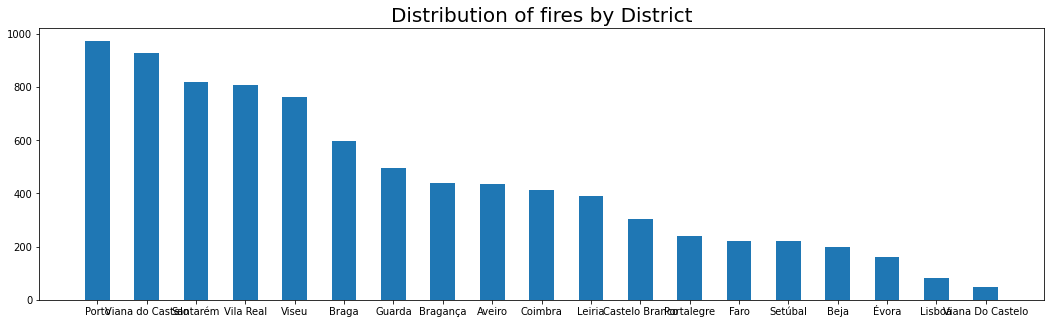

In [ ]:
# Plotting number of rows per Region
df_region = df.groupby('Distrito').size().to_dict()
df_region = dict(sorted(df_region.items(), key = lambda t: t[1], reverse=True))
labels = df_region.keys()
values = df_region.values()
plt.figure(figsize=(18, 5))
bar_plot = plt.bar(labels, values, width=0.5)
plt.title('Distribution of fires by District',fontsize=20) 
plt.show()



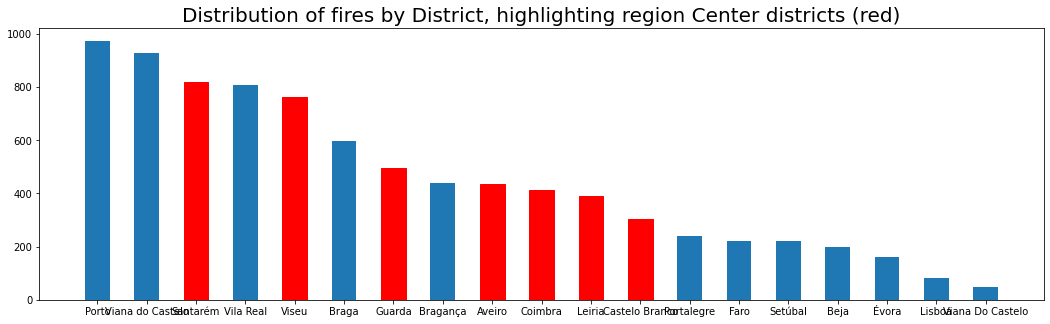

In [ ]:
# Highlighting districts from the Center
#districts = ['Aveiro', 'Viseu', 'Guarda', 'Coimbra', 'Castelo Branco',
#             'Leiria', 'Santarém', 'Lisboa'] # Santarém e Lisboa não são região Centro, mas Lisboa e Vale do Tejo
plt.figure(figsize=(18, 5))
bar_plot = plt.bar(labels, values, width=0.5)
for district in region_Centro:
  bar_plot[list(labels).index(district)].set_color('r')
plt.title('Distribution of fires by District, highlighting region Center districts (red)',fontsize=20) 
plt.show()

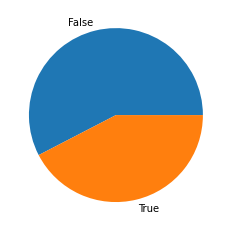

3621 Linhas são do Centro, num total de 8541 linhas


In [ ]:
# Center vs Non-center (amount of lines)
df['is_center'] = df['Distrito'].isin(region_Centro) 
d = df.groupby('is_center').size().to_dict()
plt.pie(x=d.values(), labels=d.keys())
plt.show()
print(f"{df['is_center'].sum()} Linhas são do Centro, num total de {len(df)} linhas")

# 5. Compute the distribution for region Center and the Other regions

In [ ]:
# Constructing a second dataframe, to compare the proportion of intentional/negligent wildfires between Center and non-center
# (There's a faster way of doing this, hence the warning.. I'll remake this soon)
#df = df[df['TotalAreaSegm']!='Fogacho'] # Eliminates fires less than 1ha
df_center = df[df['is_center']]
df_other = df[df['is_center'] != True]


trueCenter = len(df_center[df_center['TipoCausa'] == 'Intencional'])
trueOther = len(df_other[df_other['TipoCausa'] == 'Intencional'])
truePortugal = len(df[df['TipoCausa'] == 'Intencional'])

falseCenter = len(df_center[df_center['TipoCausa'] != 'Intencional'])
falseOther = len(df_other[df_other['TipoCausa'] != 'Intencional'])
falsePortugal = len(df[df['TipoCausa'] != 'Intencional']) 

nCenter = trueCenter + falseCenter
nOther = trueOther + falseOther
nPortugal = truePortugal + falsePortugal


data = [
  [True, trueCenter, trueOther, truePortugal],
  [False, falseCenter, falseOther, falsePortugal],
  ['Total', nCenter, nOther, nPortugal],
]


# This table is similar to the one in slide 27 of chp5_2p.pdf from the references
sum_df = pd.DataFrame(columns=['is_intentional', 'Center', 'Other', 'Portugal'], data=data)
sum_df

,is_intentional,Center,Other,Portugal
0,True,1219,1750,2969
1,False,2402,3170,5572
2,Total,3621,4920,8541


#Step 4. Draw inferences beyond the data

#6. Testing the null hypothesis
H0: The percentage of intentional/negligent fires in the Center region does not differ from the rest of the regions.

$$ \hat{p}_{Center} - \hat{p}_{Other} = 0$$

HA: The percentage of intentional/negligent fires in the Center region is larger than in the other regions

$$ \hat{p}_{Center} - \hat{p}_{Other} > 0$$


#Pooled estimate of a proportion

Slide 22 of chp6_2.pdf

$$ \hat{p}_0 = \frac{\#~of~successes1 + \#~of~successes2}{n1 + n2} $$

In [ ]:
# The pooled estimate of a proportion is presented in slide 22 of chp6_2p.pdf from the references
pPortugal = truePortugal / nPortugal
print(f'The pooled estimate of percentage of intentional/negligent fires (in Portugal) is {round(pPortugal*100,2)}%')


The pooled estimate of percentage of intentional/negligent fires (in Portugal) is 34.76%


#Compute the test statistics

$$ Z = \frac{(\hat{p}_{Center} - \hat{p}_{Other})}{\sqrt{\hat{p}_{0}(1 - \hat{p}_{0})\left( \frac{1}{n_{Center}} + \frac{1}{n_{Other}} \right)}} $$



In [ ]:
# Calculating the proportions:

pCenter = trueCenter / nCenter
pOther = trueOther / nOther


print(f'{round(pCenter*100,2)}% of the fires in the Center region had intentional/negligent origin')
print(f'{round(pOther*100,2)}% of the fires in the other regions had intentional/negligent origin')

33.66% of the fires in the Center region had intentional/negligent origin
35.57% of the fires in the other regions had intentional/negligent origin


In [ ]:
# The test statistics of a difference of proportions is presented in slide 24 of chp6_2p.pdf from the references

Z = (pCenter - pOther )/(sqrt(pPortugal*(1-pPortugal)*(1/nCenter + 1/nOther)))

print(f'The test statistic of the difference of proportions is {Z}')

The test statistic of the difference of proportions is -1.8263850908204677


In [ ]:
#Compute the p-value 

import scipy.stats as st

print(f'p-value = 2 * P(Z < {round(Z,6)}):')

#REFERENCE: https://stackoverflow.com/questions/3496656/convert-z-score-z-value-standard-score-to-p-value-for-normal-distribution-in/3508321
#REFERENCE: https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa
p_value = st.norm.cdf(Z)*2 #twosided

p_value

p-value = 2 * P(Z < -1.826385)


0.06779227603599096

# Parameter of interest: 
Difference between the proportions of all Center fires and all Other regions fires with itentional/negligent origin (slide 17 of chp6_2.pdf)


$$ (\hat{p}_{Center} - \hat{p}_{Other})  \pm 1.95996  \sqrt{\frac{\hat{p}_{Center}(1 - \hat{p}_{Center})}{n_{Center}} + \frac{\hat{p}_{Other}(1 - \hat{p}_{Other})}{n_{Other}}} $$

In [ ]:
# The left and right of our confidence interval
left = (pCenter - pOther) - st.norm.ppf(.975) * sqrt(pCenter*(1-pCenter)/nCenter + pOther*(1-pOther)/nOther)
right = (pCenter - pOther) + st.norm.ppf(.975)* sqrt(pCenter*(1-pCenter)/nCenter + pOther*(1-pOther)/nOther)

print(f'Confidence interval for a significance of 5%: ({left}, {right})')

Confidence interval for a significance of 5%: (-0.03943608151420823, 0.0013486376737383114)


#Simulating with random samples

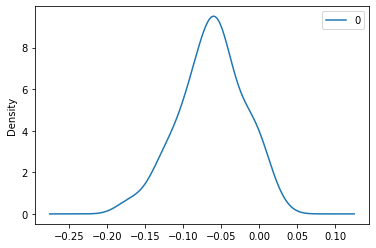

In [ ]:
# Params
SAMPLE_SIZE = 200
ITERATIONS = 100

# Function to get the % of intentional/negligent fires (Center vs. Non-Center)
def get_criminal_count(df):
  center = df[df['is_center'] == True]['TipoCausa'].value_counts()['Intencional'] / len(df)
  other = df[df['is_center'] == False]['TipoCausa'].value_counts()['Intencional'] / len(df)
  return center - other

results = list(get_criminal_count(df.sample(SAMPLE_SIZE)) for i in range(ITERATIONS))

pd.DataFrame(results).plot(kind='density')
plt.show()